# Google Play Store Analysis

### Objective 
<b>Google Play Store</b> team is about to launch a new feature where in certain apps that are
promising are boosted in visibility. <br> The boost will manifest in multiple ways – higher priority in
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”).  <br>
These will also get a boost in visibility in search results.<br> This feature will help bring more
attention to newer apps that have potential.<br>
The task is to understand what makes an app perform well - <b> size? price? category? multiple
factors together? </b><br> <b>Analyze the data and present your insights</b> in a format consumable by
business – the final output of the analysis would be presented to business as insights with
supporting data/visualizations.  

Getting Started

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Getting Our Data into Pandas dataframe

In [2]:
data = pd.read_csv('playstore-analysis.csv')

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


In [5]:
data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841.000000,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,NaN,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,NaN,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,NaN,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,21516.529524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,20746.537567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,8.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,5900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,18000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,26000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


# Data Cleaning

Drop records where rating is missing since rating is our target/study variable

In [7]:
data.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [8]:
data.Rating.isnull().sum()

1474

In [9]:
# data['Rating'].dropna(inplace=True,axis=0)
data.dropna(subset=["Rating"], axis=0, inplace=True)

In [10]:
data.Rating.isnull().sum()

0

Check the null values for the Android Ver column.<br>

i. Are all 3 records having the same problem?<br>
ii. Drop the 3 rd record i.e. record for “Life Made WIFI ...”<br>
iii. Replace remaining missing values with the mode<br>


In [11]:
data['Android Ver'].isna().sum()

3

In [12]:
data[data['Android Ver'].isna()]
# Not all the records has same problem, 3rd row is pretty messed up

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Dropping the third value

In [13]:
i = data[data.App=='Life Made WI-Fi Touchscreen Photo Frame'].index

In [14]:
data.drop(i,inplace=True)

In [15]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Replacing with mode values


In [16]:
Modeval = data['Android Ver'].value_counts().idxmax()

In [17]:
data['Android Ver'].replace(np.nan, Modeval, inplace=True)

In [18]:
data['Android Ver'].isna().sum()

0

In [19]:
Currval = data['Current Ver'].value_counts().idxmax()

In [20]:
data['Current Ver'].replace(np.nan, Currval, inplace=True)

In [21]:
data['Current Ver'].isna().sum()

0

Final Check to see if there is any null values

In [22]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Data Standardisation - correcting the data types

Which all variables need to be brought to numeric types?

In [23]:
data.head() # Reviews, installs, price, curr ver and android ver needs to be numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
data.info() #Rating and size is already in float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


#### Lets work with price variable first

In [25]:
data[data.Type!='Free'] # price is $4.99 we need to delete $ sign

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,FO Bixby,PERSONALIZATION,5.0,5,861.000000,100+,Paid,$0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1+,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.000000,"1,000+",Paid,$7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.000000,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [26]:
data.Price = data.Price.str.replace('$','').astype('float64') #delete $ and convert into float

In [27]:
data[data.Type!='Free'].head() # Lets see if that goes well

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.000000,"100,000+",Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.000000,"100,000+",Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.529524,"100,000+",Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


#### Now we will replace all the + from installs collumn and convert it into int

In [28]:
data.Installs = data.Installs.str.replace('+','')
data.Installs = data.Installs.str.replace(',','').astype(int)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [30]:
data.Reviews = data.Reviews.astype(int) # Changing reviews to int

In [31]:
data.Size #lets look at size

0        19000.000000
1        14000.000000
2         8700.000000
3        25000.000000
4         2800.000000
             ...     
10834     2600.000000
10836    53000.000000
10837     3600.000000
10839    21516.529524
10840    19000.000000
Name: Size, Length: 9366, dtype: float64

In [32]:
data.Size = data['Size'].apply(lambda x: round(x/1024))
#converting app size in mb 

In [33]:
data.Size

0        19
1        14
2         8
3        24
4         3
         ..
10834     3
10836    52
10837     4
10839    21
10840    19
Name: Size, Length: 9366, dtype: int64

### Sanity checks 

#### Avg. rating should be between 1 and 5, as only these values are allowed on the play store.

In [34]:
data[data.Rating>5] # There are no collumns with rating more than 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [35]:
 data[data.Reviews > data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,24,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [36]:
inds = data[data.Reviews > data.Installs].index

In [37]:
inds

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [38]:
data.drop(inds,inplace=True)

In [39]:
 data[data.Reviews > data.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### Identify and handle outliers 

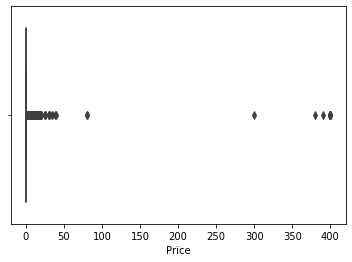

In [40]:
sns.boxplot(x=data['Price'])

In [41]:
data[data.Price>250]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,25,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,2,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,3,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,5,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,3,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,21,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,1,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [42]:
data.drop(data[data.Price>250].index,inplace=True)

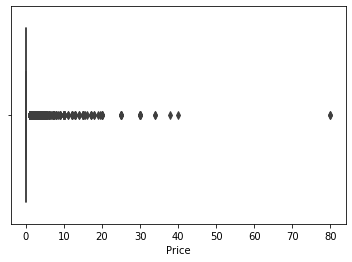

In [43]:
sns.boxplot(x=data['Price'])

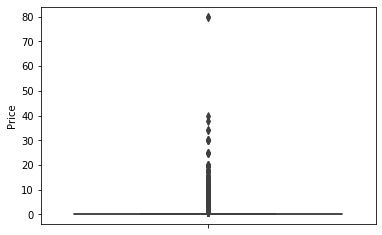

In [44]:
sns.boxplot(x=data['Price'], orient='v')

Do you expect apps on the play store to cost 200? Check out these cases <br>
Answer: Apparently there is less chance to have app with cost of $200, but there can be an app.

#### Limiting data to records with price < $30

In [45]:
data = data[data.Price<30]

In [46]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,24,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,3,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,3,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,52,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,4,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#### Review collumn

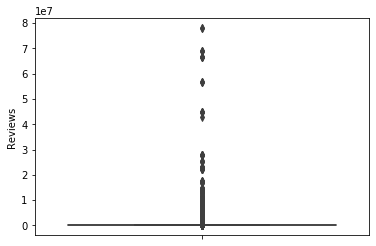

In [47]:
sns.boxplot(x=data['Reviews'], orient='v')

In [48]:
data.Reviews.value_counts()

2         81
3         78
5         74
4         73
1         67
          ..
624924     1
33053      1
4383       1
43296      1
739329     1
Name: Reviews, Length: 5988, dtype: int64

In [49]:
data = data[data.Reviews<1000000] #Limit data to apps with < 1 Million reviews

#### Installs

In [50]:
per = np.percentile(data.Installs,95)

In [51]:
data = data.drop(data[data.Installs>per].index) # dropping rows having installs more than 95%

## Data analysis to answer business questions

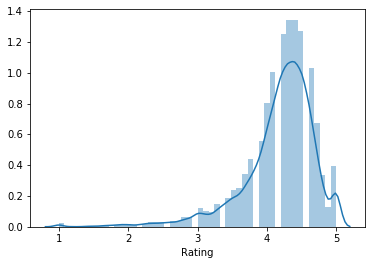

In [52]:
sns.distplot(data.Rating)

Ratings are more skewed to the lower values of rating, as seen from the plot there are more apps with rating between 4 and 5. whereas there are very less apps with rating 1 and 2

In [53]:
data.Rating.skew() # We can check the skewness by skew() method.

-1.7434270330647985

As Skew value is negative data.Rating is negatively skewed.


#### What are the top Content Rating values?

In [54]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

dropping unnecessary rows, because unrated and adults has only 4 values.

In [55]:
temp = data[data['Content Rating']=='Adults only 18+'].index
temp2 = data[data['Content Rating']=='Unrated'].index
print(temp, temp2)

Int64Index([298, 3043, 6424], dtype='int64') Int64Index([8266], dtype='int64')


In [56]:
data.drop(temp,inplace=True)
data.drop(temp2,inplace=True)

#### Effect of size on rating

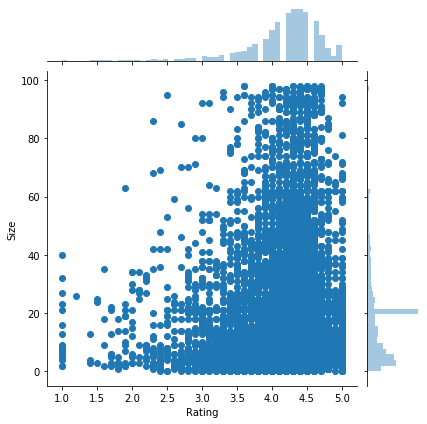

In [57]:
sns.jointplot(x ='Rating', y ='Size',data = data)
plt.show()

There is a pattern, apps with size between 0 to 20 are given 4 and up rating. We can also say as the rating is increasing size of app is also increasing.

#### Effect of price on rating

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

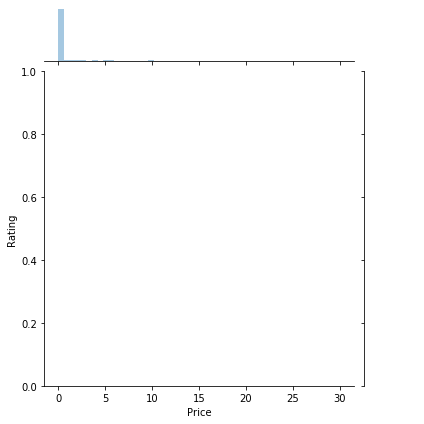

In [58]:
sns.jointplot(x='Price', y='Rating', data=data, kind='reg')

#### Look at all the numeric interactions together

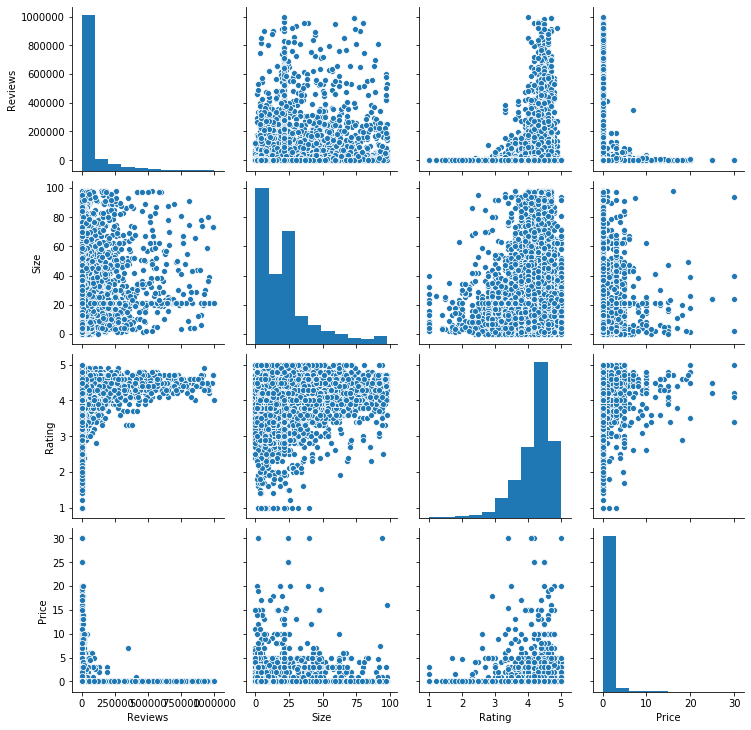

In [59]:
sns.pairplot(data[['Reviews', 'Size', 'Rating', 'Price']])

#### Rating vs. content rating

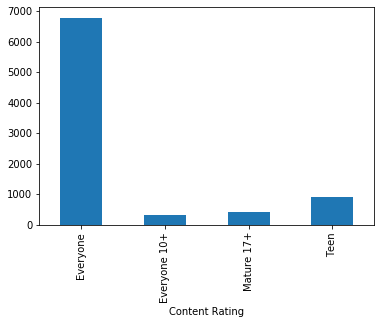

In [60]:
data.groupby(['Content Rating'])['Rating'].count().plot(kind='bar');

Which metric would you use? Mean? Median? Some other quantile? <br>
answer: Median is the best choice

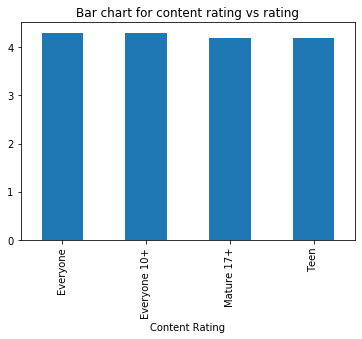

In [61]:
data.groupby(['Content Rating'])['Rating'].median().plot(kind='bar',
                                    legend = False,
                                    title="Bar chart for content rating vs rating")

#### Content rating vs. size vs. rating – 3 variables at a time

In [62]:
data.Size

0        19
1        14
2         8
4         3
5         5
         ..
10834     3
10836    52
10837     4
10839    21
10840    19
Name: Size, Length: 8431, dtype: int64

In [63]:
bins=[0, 20, 40, 60, 80, 100]
data['Bucket Size'] = pd.cut(data['Size'], bins, labels=['0-20mb','20mb-40mb','40mb-60mb','60mb-80mb','80mb-100mb'])
pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20mb,4.153098,4.249383,4.019149,4.181543
20mb-40mb,4.198173,4.171429,4.155556,4.167857
40mb-60mb,4.177371,4.275000,4.187805,4.231731
60mb-80mb,4.239583,4.234483,4.217647,4.307353
80mb-100mb,4.265986,4.362500,4.258824,4.264815


In [64]:
temp = pd.pivot_table(data, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
temp

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20mb,3.8,4.00,3.5,3.90
20mb-40mb,4.0,4.00,4.0,3.90
40mb-60mb,3.9,4.06,4.0,4.00
60mb-80mb,3.9,4.00,4.0,4.04
80mb-100mb,4.1,4.20,4.0,4.00


#### Make a heatmap of this

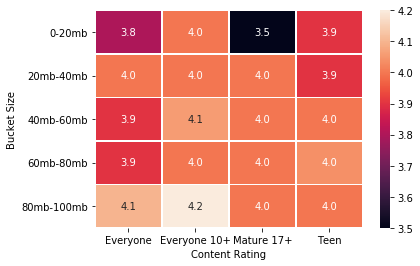

In [65]:
sns.heatmap(temp, annot=True, linewidths=.5, fmt='.1f')

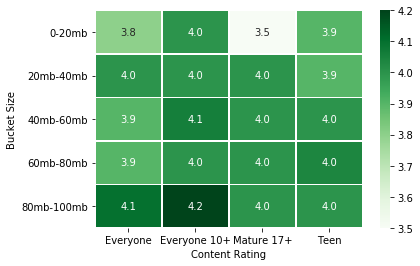

In [66]:
sns.heatmap(temp, annot=True, linewidths=.5, cmap='Greens',fmt='.1f')

What’s your inference? Are lighter apps preferred in all categories? Heavier? Some? <br>
We have seen that rating is evenly distribute around the app sizes, so we cant say that lighter apps are preferred.<br> apps with size 40-60 Mb and 80-100 Mb are also having higher ratings. 